In [48]:
#import important libraries

from bs4 import BeautifulSoup
import pandas as pd
import csv
import time
import datetime as datetime
import requests

In [7]:
# making a connection with amazon

url = "https://www.amazon.in/HP-Anti-Glare-Graphics-15s-eq2212AU/dp/B0BQN2HV46/ref=sr_1_1_sspa?crid=3HV6JFJH943LL&dib=eyJ2IjoiMSJ9.WifNivQBpjuvhFIYEWok9siu1EtOzMlp7jOa6aEBHEJzfJTnB5yAUYIlb6sahJuPdNgovGd-U2Iz579hXYP4a3XU-3xKLlxRxPQ4at3AKwJtiGNUDDMcMbBoD4NKicIhgI7SRI6LnUZOQT9S1G8yYf7OCFju91cFQWNlUOBYn3KWrBD0c7ZEp0jpBdV6vS9n3jWnIzujckfbpyKGumL7QwRtaBiVHlOzm6OkcsCQgXU.cUZGmjaPH7zDj8SUsZUgMvg74lBnkwUYKwH_mgVUZsE&dib_tag=se&keywords=laptop&qid=1727601705&sprefix=lapt%2Caps%2C562&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1"

page = requests.get(url)


<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
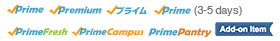
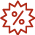

In [9]:
soup = BeautifulSoup(page.text,"html")
soup

In [21]:
p1 = soup.find(id="productTitle").text
p1 = p1.strip()
p1

'HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (39.6 cm), FHD, 8GB DDR4, 512GB SSD, AMD Radeon graphics, Thin & light, Dual speakers (Win 11, MSO 2021, Silver, 1.69 kg), eq2212AU'

In [36]:
#fetching price using selenium as it is  dynamic 

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

driver.get(url)

price = driver.find_element(By.XPATH,'//span[@class = "a-price aok-align-center reinventPricePriceToPayMargin priceToPay"]')

price = price.text

driver.quit()

In [40]:
price1 = price[1:]
price1

'31,789'

In [53]:
type(price1)

str

In [54]:
#Exporting it into CSV


header = ['Product','Price']
data = [p1,price1]

with open("lapotp.csv","w",newline="",encoding="UTF8") as f:
    w = csv.writer(f)
    w.writerow(header)
    w.writerow(data)


In [56]:
pd.read_csv("lapotp.csv")

,Product,Price
0,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"


In [57]:
#funciton creating for automation

def check_price():
    #import important libraries

    from bs4 import BeautifulSoup
    import pandas as pd
    import csv
    import time
    import datetime as datetime
    import requests

    # making a connection with amazon

    url = "https://www.amazon.in/HP-Anti-Glare-Graphics-15s-eq2212AU/dp/B0BQN2HV46/ref=sr_1_1_sspa?crid=3HV6JFJH943LL&dib=eyJ2IjoiMSJ9.WifNivQBpjuvhFIYEWok9siu1EtOzMlp7jOa6aEBHEJzfJTnB5yAUYIlb6sahJuPdNgovGd-U2Iz579hXYP4a3XU-3xKLlxRxPQ4at3AKwJtiGNUDDMcMbBoD4NKicIhgI7SRI6LnUZOQT9S1G8yYf7OCFju91cFQWNlUOBYn3KWrBD0c7ZEp0jpBdV6vS9n3jWnIzujckfbpyKGumL7QwRtaBiVHlOzm6OkcsCQgXU.cUZGmjaPH7zDj8SUsZUgMvg74lBnkwUYKwH_mgVUZsE&dib_tag=se&keywords=laptop&qid=1727601705&sprefix=lapt%2Caps%2C562&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1"

    page = requests.get(url)


    p1 = soup.find(id="productTitle").text
    p1 = p1.strip()

    
    #fetching price using selenium as it is  dynamic 

    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.chrome.service import Service
    from webdriver_manager.chrome import ChromeDriverManager
    
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    
    driver.get(url)
    
    price = driver.find_element(By.XPATH,'//span[@class = "a-price aok-align-center reinventPricePriceToPayMargin priceToPay"]')
    
    price = price.text
    
    driver.quit()

    price1 = price[1:]
    price1
    
    #Exporting it into CSV
    
    
    header = ['Product','Price']
    data = [p1,price1]
    
    with open("lapotp.csv","a+",newline="",encoding="UTF8") as f:
        w = csv.writer(f)
        w.writerow(data)

        
        

In [59]:
#function being called

check_price()

In [61]:
pd.read_csv("lapotp.csv")

,Product,Price
0,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"
1,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"
2,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"


In [62]:
#timeinteranl to check the price

while(True):
    check_price()
    time.sleep(10)

Exception ignored in: <function Service.__del__ at 0x000002976452A700>
Traceback (most recent call last):
  File "C:\Users\sharief\AppData\Local\Programs\Python\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 192, in __del__
    self.stop()
  File "C:\Users\sharief\AppData\Local\Programs\Python\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 149, in stop
    self.send_remote_shutdown_command()
  File "C:\Users\sharief\AppData\Local\Programs\Python\Python312\Lib\site-packages\selenium\webdriver\common\service.py", line 129, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "C:\Users\sharief\AppData\Local\Programs\Python\Python312\Lib\urllib\request.py", line 215, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sharief\AppData\Local\Programs\Python\Python312\Lib\urllib\request.py", line 515, in open
    response = self._open(req, data)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=129.0.6668.60)
Stacktrace:
	GetHandleVerifier [0x008F6AB3+25587]
	(No symbol) [0x00889C54]
	(No symbol) [0x00782113]
	(No symbol) [0x0075E23B]
	(No symbol) [0x007F179F]
	(No symbol) [0x00804CB9]
	(No symbol) [0x007EA936]
	(No symbol) [0x007BBA73]
	(No symbol) [0x007BC4CD]
	GetHandleVerifier [0x00BD4C63+3032483]
	GetHandleVerifier [0x00C26B99+3368153]
	GetHandleVerifier [0x00988F62+624802]
	GetHandleVerifier [0x009907DC+655644]
	(No symbol) [0x0089260D]
	(No symbol) [0x0088F6D8]
	(No symbol) [0x0088F875]
	(No symbol) [0x00881CA6]
	BaseThreadInitThunk [0x757AFCC9+25]
	RtlGetAppContainerNamedObjectPath [0x76FD80CE+286]
	RtlGetAppContainerNamedObjectPath [0x76FD809E+238]


In [63]:
pd.read_csv("lapotp.csv")

,Product,Price
0,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"
1,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"
2,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"
3,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"
4,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"
5,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"
6,"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (3...","31,789"
